# Week5 - Logistic Regression Assignment

- Run the below cells.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

In [2]:
# insert code
df['left_company'].value_counts() # finds the distribution

Yes    500
No     500
Name: left_company, dtype: int64

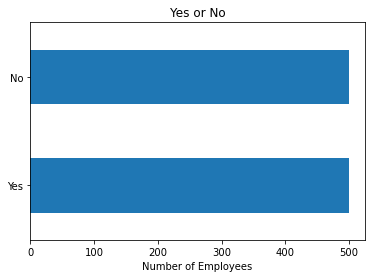

In [3]:
df['left_company'].value_counts().plot.barh()
plt.title('Yes or No')
plt.xlabel('Number of Employees')
plt.show()

**Insert comments here - The distribution of target is equal that is Yes (500) and No (500). From the above output, I can say that distribution of target is balanced because both classes have same number of values (i.e., 500). Since, the distribution of target is equal, I don't have any concerns on the class imbalances.**

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [4]:
df.info() # get the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   left_company                   1000 non-null   object
 1   age                            1000 non-null   int64 
 2   frequency_of_travel            1000 non-null   object
 3   department                     1000 non-null   object
 4   commuting_distance             1000 non-null   int64 
 5   education                      1000 non-null   int64 
 6   satisfaction_with_environment  1000 non-null   int64 
 7   gender                         1000 non-null   object
 8   seniority_level                1000 non-null   int64 
 9   position                       1000 non-null   object
 10  satisfaction_with_job          1000 non-null   int64 
 11  married_or_single              1000 non-null   object
 12  last_raise_pct                 1000 non-null   int64 
 13  last

**Analyze the values of columns to find which seems to be categorical but are numerical in the data and vice versa.**

In [5]:
df['age'].value_counts() #It is purely numeric

29    63
34    57
31    57
33    56
28    52
32    44
35    44
30    39
36    38
40    37
44    31
26    31
38    26
37    24
39    24
41    23
46    23
43    22
27    20
42    20
52    19
20    18
47    18
25    16
24    16
45    16
22    15
21    15
50    15
49    14
55    14
18    14
58    12
56    10
48     9
51     9
19     8
53     8
23     7
59     7
54     5
57     2
60     2
Name: age, dtype: int64

In [6]:
df['commuting_distance'].value_counts() # it is also numeric

2     150
1     123
9      70
3      56
10     55
7      53
5      48
8      48
6      38
4      26
24     26
29     24
11     24
16     23
13     21
23     21
18     21
20     20
15     20
12     18
21     16
14     15
22     15
25     13
19     12
17     12
26     12
27     12
28      8
Name: commuting_distance, dtype: int64

In [7]:
df['education'].value_counts() 
# it can be categorical because it has only 5 repeated values and can be treated as ordinal categorical variable

3    384
4    259
2    203
1    125
5     29
Name: education, dtype: int64

In [8]:
df['satisfaction_with_environment'].value_counts() 
# it can be categorical because it has only 4 repeated values and can be treated as ordinal categorical variable

3    308
4    266
1    243
2    183
Name: satisfaction_with_environment, dtype: int64

In [9]:
df['seniority_level'].value_counts() 
# it can be categorical because it has only 5 repeated values and can be treated as ordinal categorical variable

1    455
2    309
3    144
4     56
5     36
Name: seniority_level, dtype: int64

In [10]:
df['satisfaction_with_job'].value_counts() 
# it can be categorical because it has only 4 repeated values and it seems to be rating and can be treated as ordinal categorical variable

3    302
4    276
1    233
2    189
Name: satisfaction_with_job, dtype: int64

In [11]:
df['last_raise_pct'].value_counts() # it is numeric 

13    158
11    157
12    121
14    114
15     78
17     58
18     58
22     50
19     46
16     44
21     34
20     32
23     24
24     19
25      7
Name: last_raise_pct, dtype: int64

In [12]:
df['last_performance_rating'].value_counts() 
# it is categorical because it talks about rating and has only 2 values and can be treated as ordinal categorical variable

3    834
4    166
Name: last_performance_rating, dtype: int64

In [13]:
df['total_years_working'].value_counts() # it is numeric because it has range of values

10    116
6      90
1      88
8      72
5      64
9      56
7      53
4      51
11     34
2      33
12     30
13     28
16     26
3      26
14     24
15     21
18     19
21     17
0      16
17     15
19     12
20     11
22     11
23     11
24     11
25      9
28      9
26      7
33      6
30      5
31      4
32      4
34      4
40      4
29      3
27      3
35      3
36      3
37      1
Name: total_years_working, dtype: int64

In [14]:
df['years_at_company'].value_counts() # it is numeric because it has range of values

1     159
5     122
2      94
3      79
4      75
10     75
9      57
8      53
7      52
6      49
0      44
11     23
13     19
20     14
15     12
14      9
17      8
21      7
18      7
22      6
19      5
33      5
32      5
16      3
31      3
26      2
25      2
24      2
23      2
12      2
40      2
27      1
30      1
36      1
Name: years_at_company, dtype: int64

In [15]:
df['years_in_current_job'].value_counts() # it is numeric because it has range of values

2     262
0     211
7     168
3      78
4      72
8      48
9      45
1      36
10     15
6      14
5      13
14     10
11      9
15      8
13      5
12      3
16      1
17      1
18      1
Name: years_in_current_job, dtype: int64

In [16]:
df['years_since_last_promotion'].value_counts() # it is numeric because it has range of values

0     415
1     221
2     119
3      47
7      47
4      35
6      31
5      22
9      14
8      11
15     11
11      8
10      5
13      5
14      5
12      4
Name: years_since_last_promotion, dtype: int64

In [17]:
df['years_with_current_supervisor'].value_counts() # it is numeric because it has range of values

0     240
2     208
7     146
3      85
4      61
1      59
8      57
9      46
10     24
5      22
6      19
11      8
12      8
13      8
14      4
15      2
17      2
16      1
Name: years_with_current_supervisor, dtype: int64

In [18]:
numerical_variables = ['age','commuting_distance','last_raise_pct','total_years_working','years_at_company','years_in_current_job','years_since_last_promotion','years_with_current_supervisor']
numerical_variables

['age',
 'commuting_distance',
 'last_raise_pct',
 'total_years_working',
 'years_at_company',
 'years_in_current_job',
 'years_since_last_promotion',
 'years_with_current_supervisor']

In [19]:
categorical_variables = [cat for cat in df.columns if cat not in numerical_variables]
categorical_variables

['left_company',
 'frequency_of_travel',
 'department',
 'education',
 'satisfaction_with_environment',
 'gender',
 'seniority_level',
 'position',
 'satisfaction_with_job',
 'married_or_single',
 'last_performance_rating']

In [20]:
categorical_variables.remove('left_company')

In [21]:
categorical_variables

['frequency_of_travel',
 'department',
 'education',
 'satisfaction_with_environment',
 'gender',
 'seniority_level',
 'position',
 'satisfaction_with_job',
 'married_or_single',
 'last_performance_rating']

Insert comments here

**First, I have analyzed the column values and then assigned education, satisfaction_with_environment, seniority_level, satisfaction_with_job, last_performance_rating to categorical because these all have repeated values which can be categorical (ordinal categorical). These all have values like rating and education level which can be categorical not numerical. This is the reason why I have selected them as categorical and others as numeric.** 

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

In [22]:
df[numerical_variables].corr() # first find the correlation between numerical variables

,age,commuting_distance,last_raise_pct,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
age,1.000000,0.012074,0.027851,0.673804,0.384760,0.310010,0.242456,0.273679
commuting_distance,0.012074,1.000000,0.104421,0.025593,0.023017,0.031890,0.047552,0.031520
last_raise_pct,0.027851,0.104421,1.000000,-0.004905,0.004435,0.039691,0.000615,0.060882
total_years_working,0.673804,0.025593,-0.004905,1.000000,0.685955,0.548494,0.423619,0.506007
years_at_company,0.384760,0.023017,0.004435,0.685955,1.000000,0.801423,0.630344,0.781147
years_in_current_job,0.310010,0.031890,0.039691,0.548494,0.801423,1.000000,0.611928,0.781647
years_since_last_promotion,0.242456,0.047552,0.000615,0.423619,0.630344,0.611928,1.000000,0.599529
years_with_current_supervisor,0.273679,0.031520,0.060882,0.506007,0.781147,0.781647,0.599529,1.000000


<AxesSubplot:>

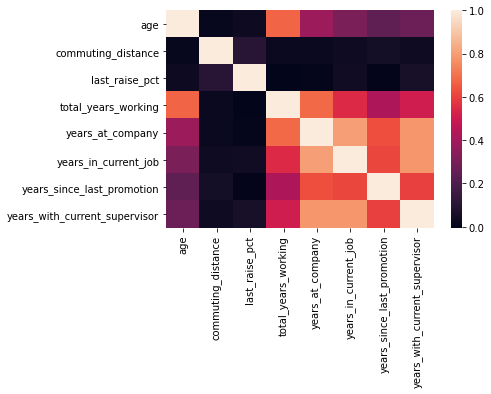

In [23]:
sns.heatmap(df[numerical_variables].corr()) # heatmap of correlation of numerical variables

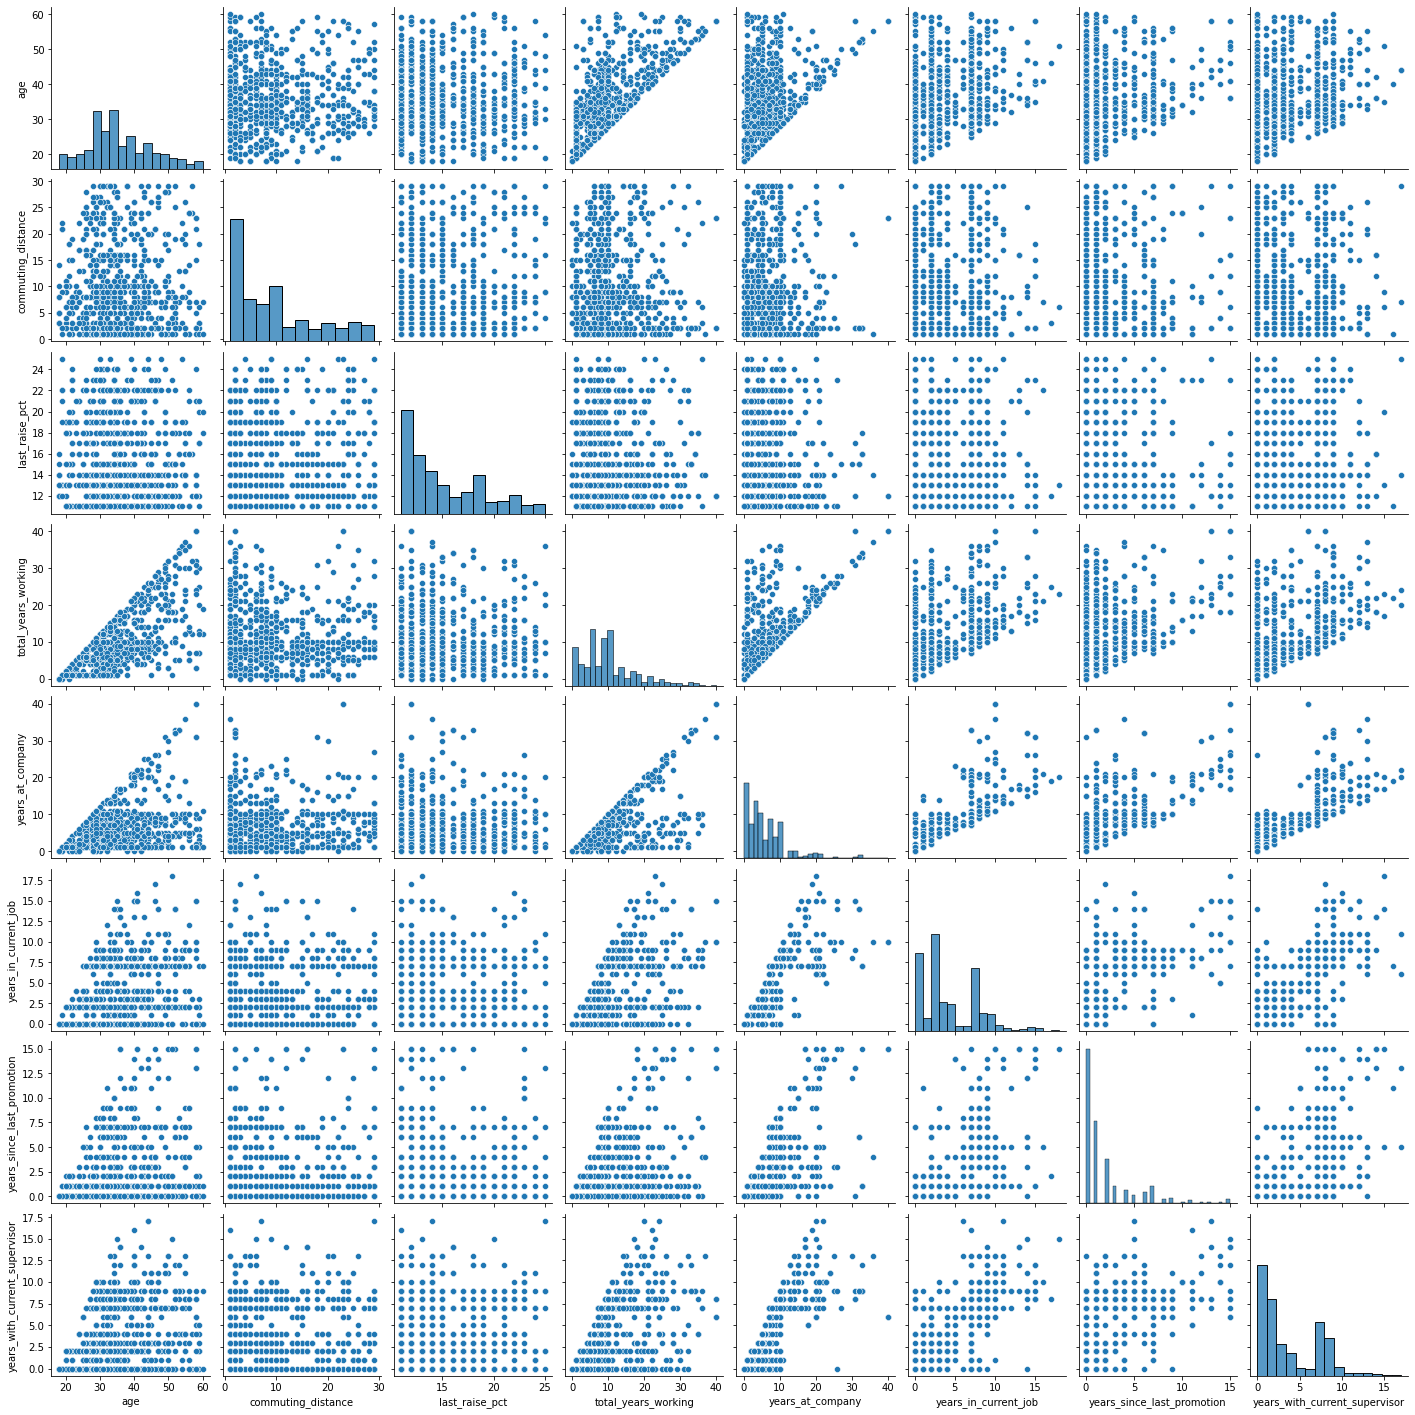

In [24]:
sns.pairplot(df[numerical_variables]) # get the pairplot of dataset

**The above correlation function, heatmap and pairplot shows only the relationship between two variables and not with the group of variables. To find the relationship on the group of variables, variance inflation factor values can be used because it shows the correlation of variable with other variables which is basically the concept of multicollinearity.**


**The following function is used to calculate the variance inflation factor which helps in finding the multicollinearity of the numerical variables.**

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def var_in_fac(X):
    # Calculating VIF
    var_in_fac = pd.DataFrame()
    var_in_fac["Variables"] = df[numerical_variables].columns
    var_in_fac["Variance Inflation Factor"] = [variance_inflation_factor(df[numerical_variables].values, i) for i in range(df[numerical_variables].shape[1])]

    return(var_in_fac)

In [26]:
X = df.iloc[:,:-1]
var_in_fac(X)

,Variables,Variance Inflation Factor
0,age,16.669850
1,commuting_distance,2.389730
2,last_raise_pct,10.656507
3,total_years_working,7.622769
4,years_at_company,9.588173
5,years_in_current_job,7.656341
6,years_since_last_promotion,2.590716
7,years_with_current_supervisor,6.888652


**From the above output, I can say that age has the highest variance inflation factor which means that is has high risk of multicollinearity. So, I tried to drop that column from the data and find the variance inflation factor again.**

In [27]:
df = df.drop(['age'],axis=1)

In [28]:
numerical_variables = ['commuting_distance','last_raise_pct','total_years_working','years_at_company','years_in_current_job','years_since_last_promotion','years_with_current_supervisor']
numerical_variables

['commuting_distance',
 'last_raise_pct',
 'total_years_working',
 'years_at_company',
 'years_in_current_job',
 'years_since_last_promotion',
 'years_with_current_supervisor']

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df[numerical_variables].columns
    vif["VIF"] = [variance_inflation_factor(df[numerical_variables].values, i) for i in range(df[numerical_variables].shape[1])]

    return(vif)

In [30]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,commuting_distance,2.366498
1,last_raise_pct,3.940187
2,total_years_working,5.011180
3,years_at_company,9.535979
4,years_in_current_job,7.649504
5,years_since_last_promotion,2.590647
6,years_with_current_supervisor,6.887962


**After dropping age column, some of the columns multicollinearity has also changed which means that this column impacted all the columns multicollinearity.**

**Now, I have combined the years_at_company and years_in_current_job as years_working_in_company and dropped the columns. Then, I have found the variance inflation factor again.**

In [31]:
df['years_working_in_company'] = df.apply(lambda x: x['years_at_company'] + x['years_in_current_job'],axis=1)
df = df.drop(['years_at_company','years_in_current_job'],axis=1)

In [32]:
numerical_variables = ['commuting_distance','last_raise_pct','total_years_working','years_working_in_company','years_since_last_promotion','years_with_current_supervisor']
numerical_variables

['commuting_distance',
 'last_raise_pct',
 'total_years_working',
 'years_working_in_company',
 'years_since_last_promotion',
 'years_with_current_supervisor']

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df[numerical_variables].columns
    vif["VIF"] = [variance_inflation_factor(df[numerical_variables].values, i) for i in range(df[numerical_variables].shape[1])]

    return(vif)

In [34]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,commuting_distance,2.365818
1,last_raise_pct,3.850009
2,total_years_working,4.810296
3,years_working_in_company,10.288522
4,years_since_last_promotion,2.589591
5,years_with_current_supervisor,6.809859


**The newly created column years_working_in_company has the highest multicollinearity, so I have dropped it and again found the variance inflation factor.**

In [35]:
df = df.drop(['years_working_in_company'],axis=1)

In [36]:
numerical_variables = ['commuting_distance','last_raise_pct','total_years_working','years_since_last_promotion','years_with_current_supervisor']
numerical_variables

['commuting_distance',
 'last_raise_pct',
 'total_years_working',
 'years_since_last_promotion',
 'years_with_current_supervisor']

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df[numerical_variables].columns
    vif["VIF"] = [variance_inflation_factor(df[numerical_variables].values, i) for i in range(df[numerical_variables].shape[1])]

    return(vif)

In [38]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,commuting_distance,2.365671
1,last_raise_pct,3.849253
2,total_years_working,3.598308
3,years_since_last_promotion,2.334495
4,years_with_current_supervisor,3.842648


Insert comments here

**I have dropped the columns age, years_working_in_company (combination of years_at_company, years_in_current_job) because they have the higher value of multicollinearity which means that they have high correlation with other variables. The main reason to remove is that if the columns with high multicollinearity occurs, we cannot find the effects of individual features in the model.**

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [39]:
y = df['left_company'] # Target column is left_company
X = df[[x for x in df.columns if x != 'left_company']] # Columns except the target column

In [40]:
X.columns

Index(['frequency_of_travel', 'department', 'commuting_distance', 'education',
       'satisfaction_with_environment', 'gender', 'seniority_level',
       'position', 'satisfaction_with_job', 'married_or_single',
       'last_raise_pct', 'last_performance_rating', 'total_years_working',
       'years_since_last_promotion', 'years_with_current_supervisor'],
      dtype='object')

In [41]:
X.dtypes

frequency_of_travel              object
department                       object
commuting_distance                int64
education                         int64
satisfaction_with_environment     int64
gender                           object
seniority_level                   int64
position                         object
satisfaction_with_job             int64
married_or_single                object
last_raise_pct                    int64
last_performance_rating           int64
total_years_working               int64
years_since_last_promotion        int64
years_with_current_supervisor     int64
dtype: object

In [42]:
# insert code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 124)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')


Training samples: 800
Test samples: 200


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

**Import the required libraries for pipelines.**

In [43]:
from sklearn.pipeline import Pipeline # import pipeline
from sklearn.compose import ColumnTransformer # import column transformer for transforming the data.
from sklearn.preprocessing import OneHotEncoder # used for representing categorical columns as numeric.
from sklearn.preprocessing import StandardScaler # used for standardizing the values

**Create a pipeline to process the numerical data (standardize the values using StandardScaler).**

In [44]:
# insert code here
num_pipeline = Pipeline([('standardize_num', StandardScaler())])
num_data_processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_variables)])
print(num_data_processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('standardize_num',
                                                  StandardScaler())]),
                                 ['commuting_distance', 'last_raise_pct',
                                  'total_years_working',
                                  'years_since_last_promotion',
                                  'years_with_current_supervisor'])])


**Use the fit_transform method and transform the numerical data.**

In [45]:
num_transformed_data = num_data_processing_pipeline.fit_transform(X_train)
num_transformed_data

array([[-0.33873757,  1.58693849,  0.85269911, -0.34561971,  0.63351643],
       [ 0.49987003, -0.58230678, -0.30154672, -0.66306606,  0.06597651],
       [ 0.49987003,  0.77347151,  0.72444957, -0.34561971,  0.91728638],
       ...,
       [ 0.02066569, -0.58230678, -0.04504765, -0.34561971,  0.91728638],
       [ 0.7394722 ,  2.1292498 , -0.68629533,  0.28927298, -1.06910331],
       [-0.81794191, -0.03999546, -0.04504765,  1.55905837,  0.91728638]])

**Print the shape of the transformed numerical data.**

In [46]:
num_transformed_data.shape

(800, 5)

**Create a pipeline to process categorical data (Create dummies for categorical variables using OneHotEncoder).**

In [47]:
cat_pipeline = Pipeline([('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])
cat_processing_pipeline = ColumnTransformer(transformers=[('create_dummies', cat_pipeline, categorical_variables)])

print(cat_processing_pipeline)

ColumnTransformer(transformers=[('create_dummies',
                                 Pipeline(steps=[('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['frequency_of_travel', 'department',
                                  'education', 'satisfaction_with_environment',
                                  'gender', 'seniority_level', 'position',
                                  'satisfaction_with_job', 'married_or_single',
                                  'last_performance_rating'])])


**Use the fit_transform method and transform the categorical data.**

In [48]:
cat_transformed_data = cat_processing_pipeline.fit_transform(X_train)
cat_transformed_data

<800x30 sparse matrix of type '<class 'numpy.float64'>'
	with 5880 stored elements in Compressed Sparse Row format>

**Print the shape of the transformed numerical data.**

In [49]:
cat_transformed_data.shape

(800, 30)

# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

**Create a pipeline that combines the pre-processing and implements a logistic regression model.**

In [50]:
# insert code here

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_variables),
                                                      ('create_dummies', cat_pipeline, categorical_variables)])

print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('standardize_num',
                                                  StandardScaler())]),
                                 ['commuting_distance', 'last_raise_pct',
                                  'total_years_working',
                                  'years_since_last_promotion',
                                  'years_with_current_supervisor']),
                                ('create_dummies',
                                 Pipeline(steps=[('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['frequency_of_travel', 'department',
                                  'education', 'satisfaction_with_environment',
                                  'gender', 'seniority_level', 'position',
                          

**Import the libraries.**

In [51]:
from sklearn.linear_model import LogisticRegression
from collections import defaultdict
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

**Create a pipeline that combines the pre-processing and implements a logistic regression model.**

In [52]:
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('logreg', LogisticRegression(penalty=None))]
    )
modeling_pipeline.fit(X_train, y_train) # fit the training dataset for pipeline model

C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  ['commuting_distance',
                                                   'last_raise_pct',
                                                   'total_years_working',
                                                   'years_since_last_promotion',
                                                   'years_with_current_supervisor']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['frequency_of_travel',
                                                   'department', 'education',
                                                   'satisfaction_with_environment',
                                                   'gender', 'seniority_level',
                                                   'position',
                                                   'satisfaction_with_job',
                                                   'married_or_single',
                                                   'last_performance_rating'])])),
                ('logreg', LogisticRegression(penalty=None))])

**Create predictions of the training dataset.**

In [53]:
y_train_predictions = modeling_pipeline.predict_proba(X_train)
y_train_predictions[:5]

array([[0.74859773, 0.25140227],
       [0.67794278, 0.32205722],
       [0.95543447, 0.04456553],
       [0.38422634, 0.61577366],
       [0.42565358, 0.57434642]])

**Plot the training data predictions.**

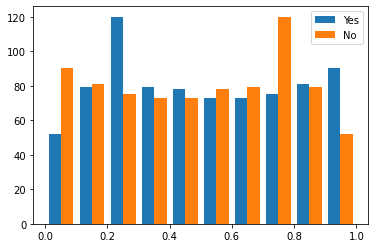

In [54]:
plt.hist(y_train_predictions)
plt.legend(['Yes', 'No'])
plt.show()

**Find the ROC_AUC score.**

In [55]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_train_predictions[:,1])

0.8278847897168508

In [56]:
from sklearn.metrics import confusion_matrix

y_train_predictions = modeling_pipeline.predict(X_train)

print(confusion_matrix(y_train, y_train_predictions))

[[305 102]
 [ 87 306]]


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_predictions))

              precision    recall  f1-score   support

          No       0.78      0.75      0.76       407
         Yes       0.75      0.78      0.76       393

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800



**Create predictions of testing dataset.**

In [58]:
y_test_predictions = modeling_pipeline.predict_proba(X_test)
y_test_predictions[:5]

array([[0.40323293, 0.59676707],
       [0.18457686, 0.81542314],
       [0.32757738, 0.67242262],
       [0.09507936, 0.90492064],
       [0.09331497, 0.90668503]])

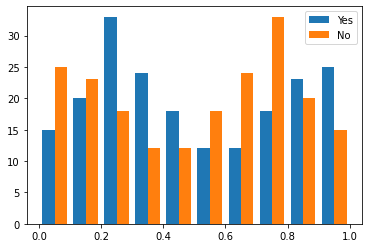

In [59]:
plt.hist(y_test_predictions)
plt.legend(['Yes', 'No'])
plt.show()

In [60]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test_predictions[:,1])

0.7655512008843333

In [61]:
from sklearn.metrics import confusion_matrix

y_test_predictions = modeling_pipeline.predict(X_test)

print(confusion_matrix(y_test, y_test_predictions))

[[62 31]
 [28 79]]


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predictions))

              precision    recall  f1-score   support

          No       0.69      0.67      0.68        93
         Yes       0.72      0.74      0.73       107

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200



In [63]:
def generate_probs(X, model=modeling_pipeline):
    return model.predict_proba(X)[:, 1]
from sklearn.metrics import roc_auc_score

print ('training: ', roc_auc_score(y_train, generate_probs(X_train)))
print ('testing: ', roc_auc_score(y_test, generate_probs(X_test)))

training:  0.8278847897168508
testing:  0.7655512008843333


**Insert comments here - From the above output, I can say there is overfitting of the data. Training data has a ROC_AUC score of 82% and accuracy of 76%. Testing data has a ROC_AUC score of 76% and accuracy of 70%. From my knowledge, I can say that this is because of complex model and this data fits the training data closely making it perform less on new data. This can be also because of many features in the data making the model difficult to learn from the various variables.**

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

**Insert comments here - As the next step to develop and evaluate a model, I can say that inclusion of penalty l2 (Ridge) to the model and also C value of 0.01 because this regularization makes the model not to overfit. And also the smaller value of C leads to stronger regularization of the model and makes the model simpler which can help in reducing overfitting.**

**I can also recommend to use dimensionality reduction (Principal Component Analysis) to reduce the overfitting.**

In [64]:

modeling_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('logreg', LogisticRegression(penalty='l2',C = 0.005))]
    )


In [65]:
modeling_pipeline.fit(X_train, y_train) # fit the training dataset for pipeline model

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  ['commuting_distance',
                                                   'last_raise_pct',
                                                   'total_years_working',
                                                   'years_since_last_promotion',
                                                   'years_with_current_supervisor']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['frequency_of_travel',
                                                   'department', 'education',
                                                   'satisfaction_with_environment',
                                                   'gender', 'seniority_level',
                                                   'position',
                                                   'satisfaction_with_job',
                                                   'married_or_single',
                                                   'last_performance_rating'])])),
                ('logreg', LogisticRegression(C=0.005))])

In [66]:
y_train_predictions = modeling_pipeline.predict_proba(X_train)
y_train_predictions[:5]

array([[0.57133123, 0.42866877],
       [0.5341157 , 0.4658843 ],
       [0.62299839, 0.37700161],
       [0.49643672, 0.50356328],
       [0.46677439, 0.53322561]])

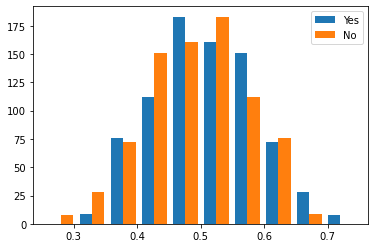

In [67]:
plt.hist(y_train_predictions)
plt.legend(['Yes', 'No'])
plt.show()

In [68]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_train_predictions[:,1])

0.7507361629499034

In [69]:
from sklearn.metrics import confusion_matrix

y_train_predictions = modeling_pipeline.predict(X_train)

print(confusion_matrix(y_train, y_train_predictions))

[[289 118]
 [131 262]]


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_predictions))

              precision    recall  f1-score   support

          No       0.69      0.71      0.70       407
         Yes       0.69      0.67      0.68       393

    accuracy                           0.69       800
   macro avg       0.69      0.69      0.69       800
weighted avg       0.69      0.69      0.69       800



In [71]:
y_test_predictions = modeling_pipeline.predict_proba(X_test)
y_test_predictions[:5]

array([[0.43900081, 0.56099919],
       [0.46458733, 0.53541267],
       [0.46212918, 0.53787082],
       [0.39404358, 0.60595642],
       [0.38169039, 0.61830961]])

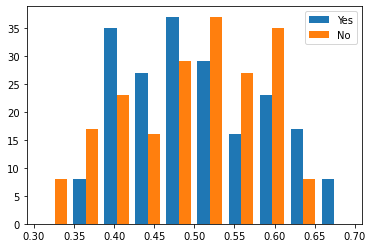

In [72]:
plt.hist(y_test_predictions)
plt.legend(['Yes', 'No'])
plt.show()

In [73]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test_predictions[:,1])

0.739423173550397

In [74]:
from sklearn.metrics import confusion_matrix

y_test_predictions = modeling_pipeline.predict(X_test)

print(confusion_matrix(y_test, y_test_predictions))

[[61 32]
 [32 75]]


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predictions))

              precision    recall  f1-score   support

          No       0.66      0.66      0.66        93
         Yes       0.70      0.70      0.70       107

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200



In [76]:
def generate_probs(X, model=modeling_pipeline):
    return model.predict_proba(X)[:, 1]

print ('training: ', roc_auc_score(y_train, generate_probs(X_train)))
print ('testing: ', roc_auc_score(y_test, generate_probs(X_test)))


training:  0.7507361629499034
testing:  0.739423173550397


**The above model does not reduce the total overfitting but it reduced to some extent. Now, the training data ROC_AUC score is 75, accuracy of 69 and testing data ROC_AUC score is 73, accuracy of 68 which seems to be better than the above model which has a difference of 6 and for this regularization model, it is 2.**